# Juan Pablo Moreno Cadena
# Código: 614201013

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Punto 2

$x_1$ → Predador.

$x_2$ → Presa.

$x_3$ → Especie mutualista 1.

$x_4$ → Especie mutualista 2.

$$
\begin{cases}x_1'(t) = f_1(t,x_1(t),x_2(t)) \\
x_2'(t) = f_2(t,x_1(t),x_2(t),x_3(t))  \\
x_3'(t) = f_3(t,x_2(t),x_3(t),x_4(t)) \\
x_4'(t) = f_4(t,x_3(t),x_4(t))
\end{cases}
$$

$$
x_1'(t) = f_1(t,x_1(t),x_2(t)) = \epsilon x_1x_2-\delta x_1
$$

$$
x_2'(t) = f_2(t,p_1(t),p_2(t)) = \eta x_2x_3-\xi x_1x_2
$$

$$
x_3'(t) = f_3(t,p_3(t),p_4(t)) = r_1x_3-\alpha_{11}x_3^2+\beta_{12}x_3x_4-\sigma x_2x_3
$$

$$
x_4'(t) = f_4(t,p_3(t),p_4(t)) = r_2x_4-\alpha_{22}x_4^2+\beta_{21}x_3x_4
$$

# Punto 3

In [3]:
# Establece los parámetros
epsilon = 0.09
delta = 0.01
eta = 0.01
xi = 0.01
r1 = 0.01
alpha11 = 0.008
beta12 = 0.05
sigma = 0.01
r2 = 0.01
alpha22 = 0.08
beta21 = 0.04

def tasa_cambio_sistema_1(t,x):
  f1 = epsilon * x[0] * x[1] - delta * x[0]
  f2 = eta * x[1] * x[2] - xi * x[0] * x[1]
  f3 = r1 * x[2] - alpha11 * x[2]**2 + beta12 * x[2] * x[3] - sigma * x[1] * x[2]
  f4 = r2 * x[3] - alpha22 * x[3]**2 + beta21 * x[2] * x[3]
  return np.array([f1,f2,f3,f4])

def jacobiano_sistema_1(t,x):
  df11 = epsilon*x[1] ; df12 = epsilon*x[0] ; df13 = 0 ; df14 = 0
  df21 = -xi*x[1] ; df22 = eta*x[2]-xi*x[0]  ; df23 = eta*x[1] ; df24 = 0
  df31 = 0 ; df32 = sigma*x[2]  ; df33 = r1-alpha11*2*x[2]+beta12*x[3]-sigma*x[1] ; df34 = beta12*x[2]
  df41 = 0 ; df42 = 0  ; df43 = beta21*x[3] ; df44 = r2-alpha22*2*x[3]+beta21*x[2]
  return np.array([[df11,df12,df13,df14],[df21,df22,df23,df24],[df31,df32,df33,df34],[df41,df42,df43,df44]])


y0=np.array([2,2,2,2])

f = tasa_cambio_sistema_1
df= jacobiano_sistema_1

m=4
N=1000
t0=0.0
tfin=35.0
h=(tfin-t0)/N


# Punto 4

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Situacion 1
epsilon = 0.5
delta = 0.2
eta = 0.3
xi = 0.4
r1 = 0.3
alpha11 = 0.9
beta12 = 0.3
sigma = 0.5
r2 = 0.3
alpha22 = 0.2
beta21 = 0.3

# Situacion 2
# epsilon = 0.5
# delta = 0.2
# eta = 0.3
# xi = 0.4
# r1 = 0.3
# alpha11 = 0.9
# beta12 = 0.3
# sigma = 0.5
# r2 = 0.3
# alpha22 = 0.2
# beta21 = 0.3

In [5]:
# Define el sistema de ecuaciones diferenciales
def f(t, x):
    x1, x2, x3, x4 = x # [2, 2, 3, 6]
    dx1_dt = epsilon * x1 * x2 - delta * x1
    dx2_dt = eta * x2 * x3 - xi * x1 * x2
    dx3_dt = r1 * x3 - alpha11 * x3**2 + beta12 * x3 * x4 - sigma * x2 * x3
    dx4_dt = r2 * x4 - alpha22 * x4**2 + beta21 * x3 * x4
    return np.array([dx1_dt, dx2_dt, dx3_dt, dx4_dt])


In [6]:
# Método de Euler para resolver ecuaciones diferenciales
def euler_method(f, t0, x0, t_final, h):
    t_values = [t0]
    x_values = [x0]
    t = t0
    x = x0
    while t < t_final:
        x = x + h * f(t, x)
        t = t + h
        t_values.append(t)
        x_values.append(x)
    return np.array(t_values), np.array(x_values)

In [7]:
# Método de punto medio explicito
def midpoint_explicit_method(f, t0, x0, t_final, h):
    t_values = [t0]
    x_values = [x0]
    t = t0
    x = x0
    while t < t_final:
        # Calcular el punto medio
        mid_t = t + h / 2
        mid_x = x + h / 2 * f(t, x)

        # Calcular el siguiente valor de x usando el punto medio
        x = x + h * f(mid_t, mid_x)
        t = t + h

        # Guardar los valores calculados
        t_values.append(t)
        x_values.append(x)

    return np.array(t_values), np.array(x_values)

In [8]:
# Método de Euler implicito
def euler_implicit_method(f, t0, x0, t_final, h, max_iterations=100):
    t_values = [t0]
    x_values = [x0]
    t = t0
    x = x0
    tolerance = 1e-6  # Tolerancia para la convergencia

    while t < t_final:
        t = t + h
        x_prev = x_values[-1][:]
        x = x_prev
        # Iteración para encontrar el siguiente valor de x
        for _ in range(max_iterations):
            x_next = x_prev + h * f(t, x)
            if np.linalg.norm(x_next - x) < tolerance:
                break
            x = x_next

        # Actualizar t y guardar los valores calculados

        t_values.append(t)
        x_values.append(x)

    return np.array(t_values), np.array(x_values)

In [9]:
# Método de trapecio implicito
from scipy.optimize import fsolve
def implicit_trapezoid_method(f, t0, x0, t_final, h):
    t_values = [t0]
    x_values = [x0]
    t = t0
    x = x0

    while t < t_final:
        # Función para la iteración de fsolve
        def equation(x_next):
            return x_next - x - h/2 * (f(t, x) + f(t + h, x_next))

        # Resolver la ecuación implícita para encontrar x_next
        x_next1 = fsolve(equation, x)[0]
        x_next2 = fsolve(equation, x)[1]
        x_next3 = fsolve(equation, x)[2]
        x_next4 = fsolve(equation, x)[3]

        x_next = [x_next1,x_next2,x_next3,x_next4]

        # Actualizar t y x para el siguiente paso
        t += h
        x = x_next

        # Guardar los valores calculados
        t_values.append(t)
        x_values.append(x)

    return np.array(t_values), np.array(x_values)

In [10]:
# Grafica las soluciones
def grafica_soluciones(t,x,metodo):
  plt.figure(figsize=(6, 3))
  plt.plot(t, x[:, 0], label='x1')
  plt.plot(t, x[:, 1], label='x2')
  plt.plot(t, x[:, 2], label='x3')
  plt.plot(t, x[:, 3], label='x4')
  plt.xlabel('Tiempo')
  plt.ylabel('Variables de Estado')
  plt.title('Solución de Ecuaciones Diferenciales usando el Método de '+metodo)
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
# Condiciones iniciales Situacion 1
t0 = 0
x0 = np.array([2, 2, 3, 6])
t_final = 60
h = 0.1


# Condiciones iniciales Situacion 2
# t0 = 0
# x0 = np.array([2, 2, 3, 6])
# t_final = 60
# h = 0.1

******************************
******************************
--------------- 0.05 ---------------
******************************
******************************


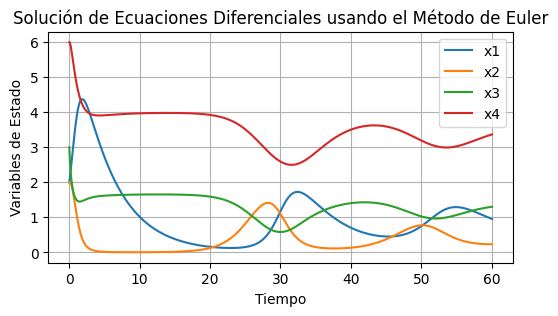

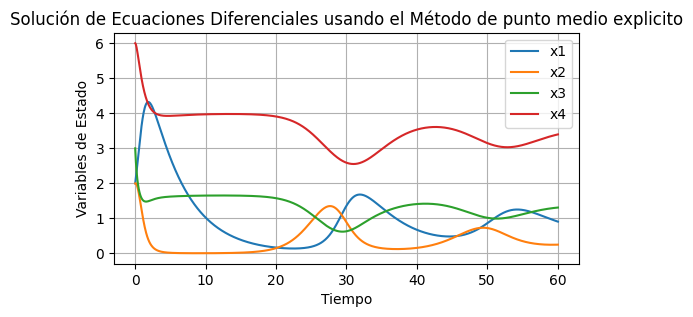

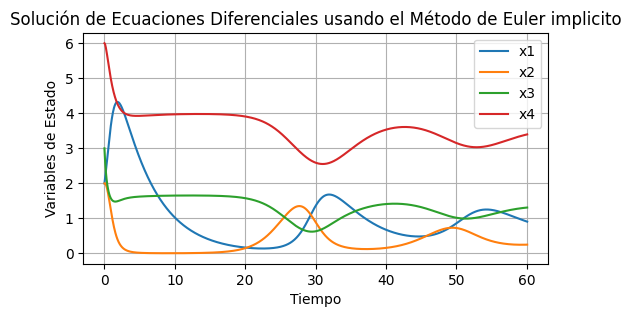

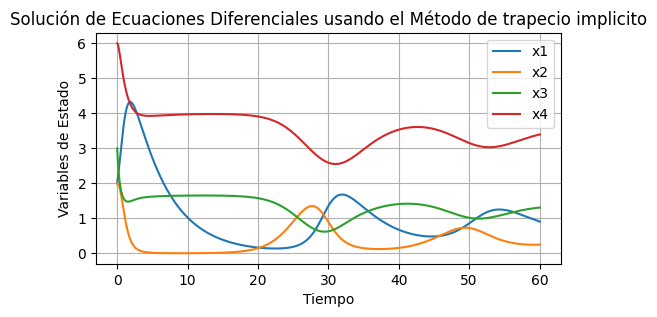

******************************
******************************
--------------- 0.02 ---------------
******************************
******************************


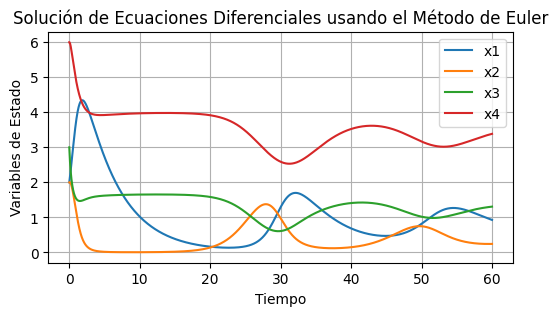

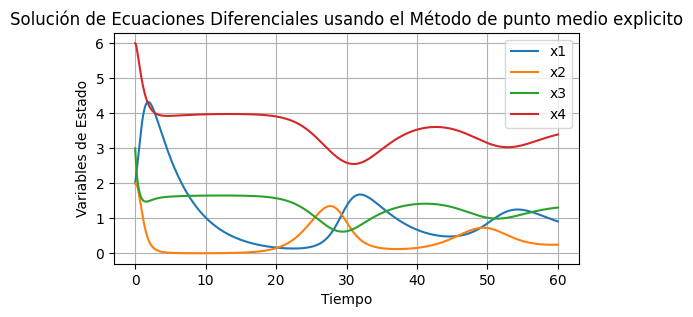

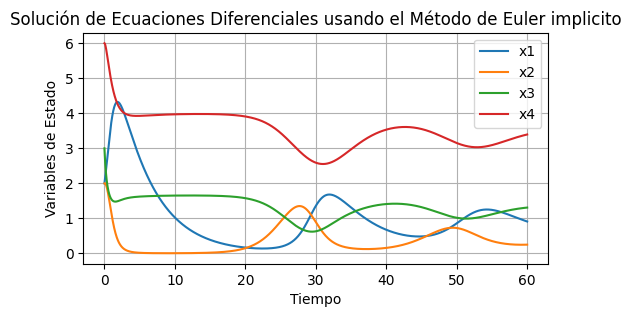

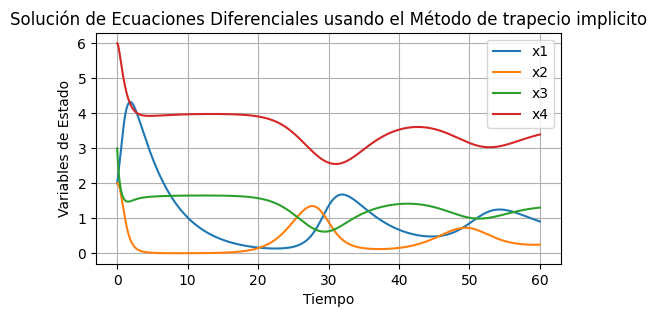

******************************
******************************
--------------- 0.01 ---------------
******************************
******************************


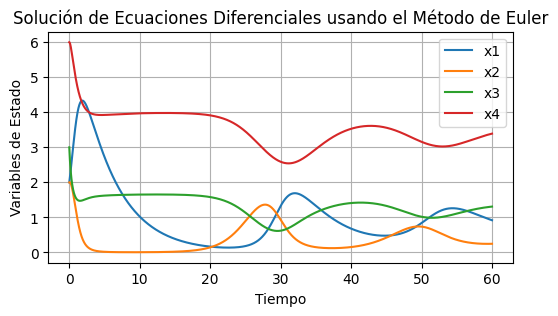

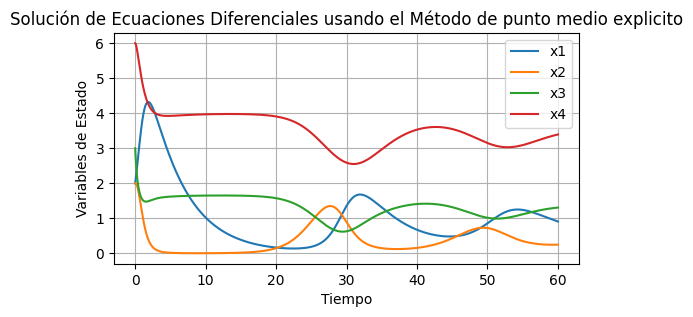

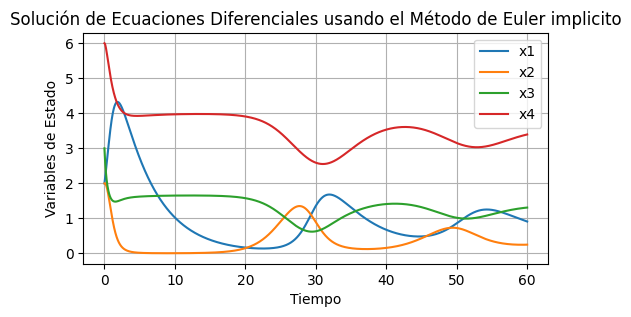

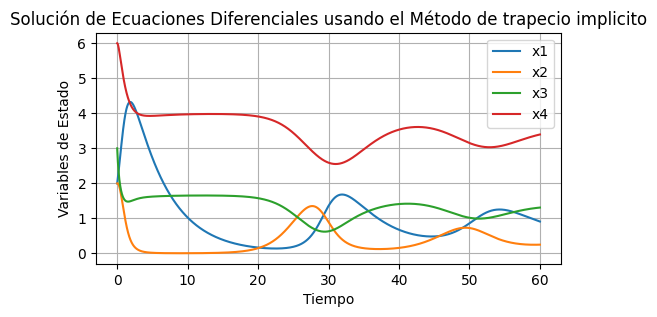

******************************
******************************
--------------- 0.005 ---------------
******************************
******************************


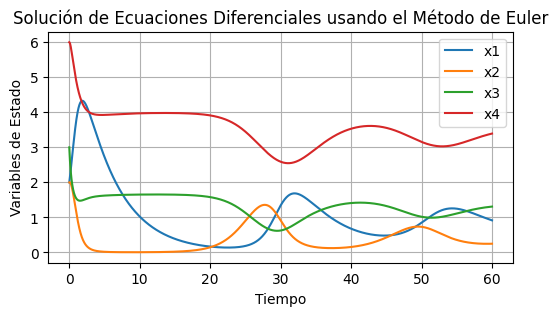

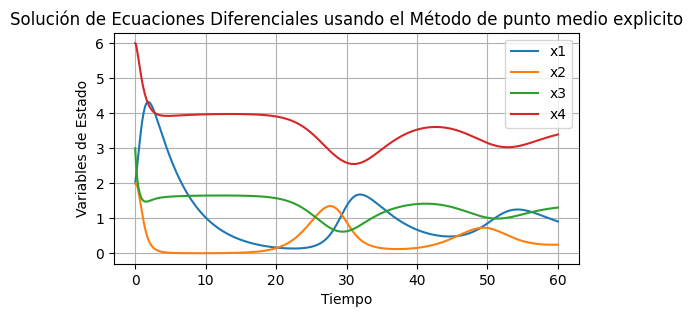

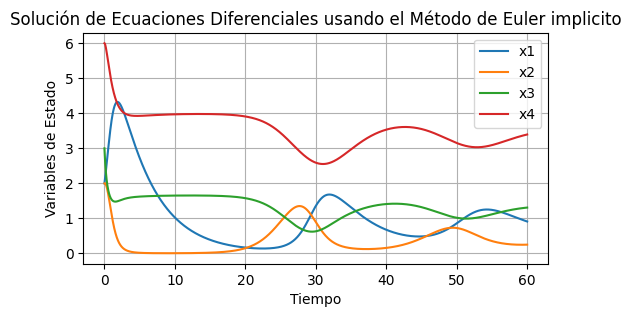

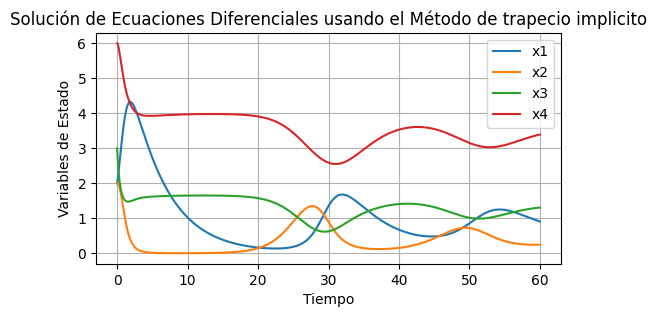

******************************
******************************
--------------- 0.001 ---------------
******************************
******************************


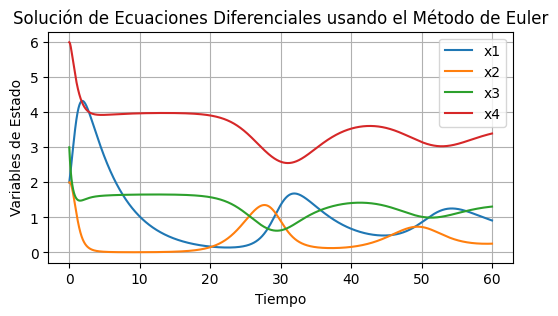

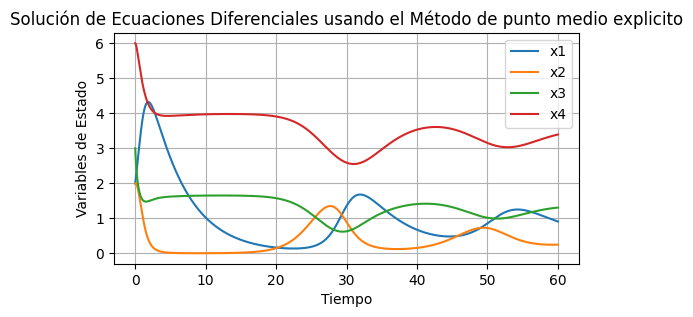

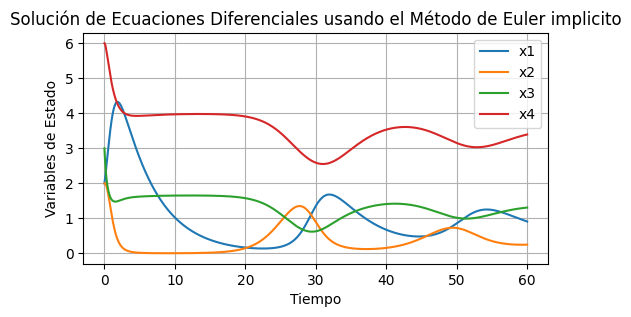

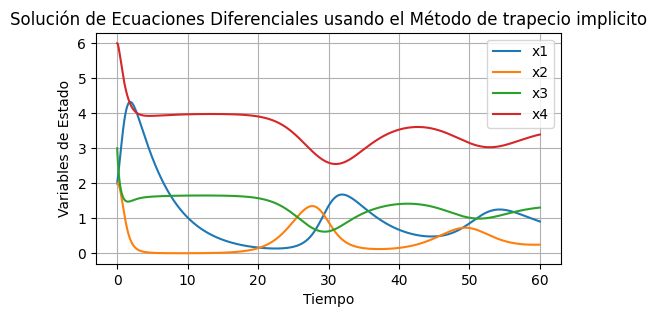

In [22]:
lista_h = [0.05,0.02,0.01,0.005,0.001]
for h_i in lista_h:

  print('*'*30)
  print('*'*30)
  print('-'*15, h_i, '-'*15)
  print('*'*30)
  print('*'*30)

  # Resuelve el sistema utilizando el método de Euler
  t_euler, x_euler = euler_method(f, t0, x0, t_final, h_i)
  grafica_soluciones(t_euler,x_euler,'Euler')

  # Resuelve el sistema utilizando el método de punto medio explicito
  t_mid_ex, x_mid_ex = midpoint_explicit_method(f, t0, x0, t_final, h_i)
  grafica_soluciones(t_mid_ex,x_mid_ex,'punto medio explicito')

  # Resuelve el sistema utilizando el método de Euler implicito
  t_euler_im, x_euler_im = midpoint_explicit_method(f, t0, x0, t_final, h_i)
  grafica_soluciones(t_euler_im,x_euler_im,'Euler implicito')

  # Resuelve el sistema utilizando el método de trapecio implicito
  t_tra_im, x_tra_im = implicit_trapezoid_method(f, t0, x0, t_final, h_i)
  grafica_soluciones(t_tra_im,x_tra_im,'trapecio implicito')

# Punto 5

In [13]:
# h_valores = [0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01]

In [14]:
def suma_result(x):
  return x[:,0][-1]+x[:,1][-1]+x[:,2][-1]+x[:,3][-1]

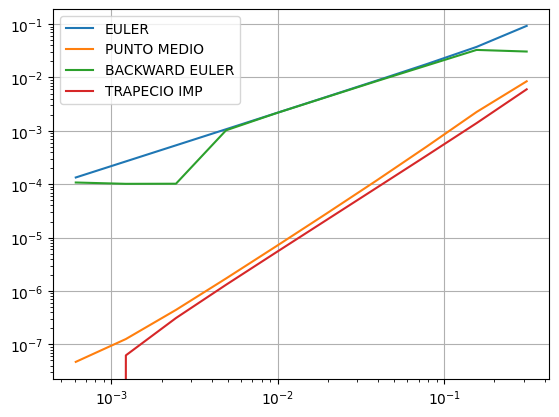

In [15]:
# t_ext, x_ext = implicit_trapezoid_method(f, t0, x0, t_final, 0.1)


# lista para y_N euler
lista_yN_e=[]
# punto medio
lista_yN_pm=[]
# euler implicito
lista_yN_ei=[]
# trapecio implicito
lista_yN_ti=[]

# for k in h_valores:

  # tn, yn = euler_method(f, t0, x0, t_final, k)
  # lista_yN_e.append(suma_result(yn))

  # tn, yn = midpoint_explicit_method(f, t0, x0, t_final, k)
  # lista_yN_pm.append(suma_result(yn))

  # tn, yn = euler_implicit_method(f, t0, x0, t_final, k)
  # lista_yN_ei.append(suma_result(yn))

  # tn, yn = implicit_trapezoid_method(f, t0, x0, t_final, k)
  # lista_yN_ti.append(suma_result(yn))

N = 16

h_valores = []

for k in range(10):

  N = 2*N
  h = (t_final-t0)/N
  h_valores.append(h)
  tn, yn = euler_method(f, t0, x0, t_final, h)
  lista_yN_e.append(suma_result(yn))

  tn, yn = midpoint_explicit_method(f, t0, x0, t_final, h)
  lista_yN_pm.append(suma_result(yn))

  tn, yn = euler_implicit_method(f, t0, x0, t_final, h)
  lista_yN_ei.append(suma_result(yn))

  tn, yn = implicit_trapezoid_method(f, t0, x0, t_final, h)
  lista_yN_ti.append(suma_result(yn))

casi_exacta = lista_yN_ti[-1]

# definimos errores

lista_error_e=[]

lista_error_pm=[]

lista_error_ei=[]

lista_error_ti=[]

for k in range(10):
    lista_error_e.append( np.abs(lista_yN_e[k] - casi_exacta) )
    lista_error_pm.append( np.abs(lista_yN_pm[k] - casi_exacta) )
    lista_error_ei.append( np.abs(lista_yN_ei[k] - casi_exacta) )
    lista_error_ti.append( np.abs(lista_yN_ti[k] - casi_exacta) )

plt.loglog(h_valores,lista_error_e)
plt.loglog(h_valores,lista_error_pm)
plt.loglog(h_valores,lista_error_ei)
plt.loglog(h_valores,lista_error_ti)
plt.legend(('EULER','PUNTO MEDIO','BACKWARD EULER','TRAPECIO IMP'))
plt.grid(True)

In [16]:
lista_h = [0.5,0.2,0.1,0.05,0.01]